PyTorch Introduction – Building your First Linear Model
Learn how to build your first PyTorch model, by using the "magical" Linear layer!

In [ ]:
%pip install torch



Loading the dataset fo song popularity 

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np


In [8]:
import pandas as pd

# load the dataset 
song_popularity_df = pd.read_csv('data/song_data.csv')
# view dataset 
song_popularity_df.head()


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [9]:
# statistics describe
song_popularity_df.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Looking at the correlation before feacturing 

Feature engineering 

In [11]:
features = ['song_duration_ms',
            'acousticness', 'danceability','energy',
            'instrumentalness', 'key', 'liveness', 'loudness',
            'audio_mode', 'speechiness',
            'tempo', 'time_signature', 'audio_valence']

target = 'song_popularity'

songPopularityFeatures = song_popularity_df[features]
songPopularityTarget = song_popularity_df[target]

In [12]:
# correlation before feacturing to understand the relation between features and target
# Use only the numeric feature columns (the `features` list is defined in a later cell)
# This avoids trying to convert the 'song_name' string column to float.
corr_matrix = song_popularity_df[features + [target]].corr()
corr_with_target = corr_matrix[target].drop(target).sort_values(ascending=False)

print("Correlation matrix (features + target):")
print(corr_matrix)
print("\nCorrelation of each feature with the target:")
print(corr_with_target)

Correlation matrix (features + target):
                  song_duration_ms  acousticness  danceability    energy  \
song_duration_ms          1.000000     -0.097882     -0.104985  0.092688   
acousticness             -0.097882      1.000000     -0.182500 -0.662639   
danceability             -0.104985     -0.182500      1.000000  0.044373   
energy                    0.092688     -0.662639      0.044373  1.000000   
instrumentalness         -0.015188      0.173098     -0.130483 -0.205914   
key                      -0.004615     -0.002025      0.007723  0.020416   
liveness                  0.016086     -0.082537     -0.090694  0.167143   
loudness                  0.016469     -0.557744      0.177639  0.755516   
audio_mode               -0.026328      0.064100     -0.106539 -0.051605   
speechiness              -0.083447     -0.093574      0.213728  0.062053   
tempo                     0.012791     -0.136421     -0.121286  0.162448   
time_signature            0.000264     -0.157177

split the dataset 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


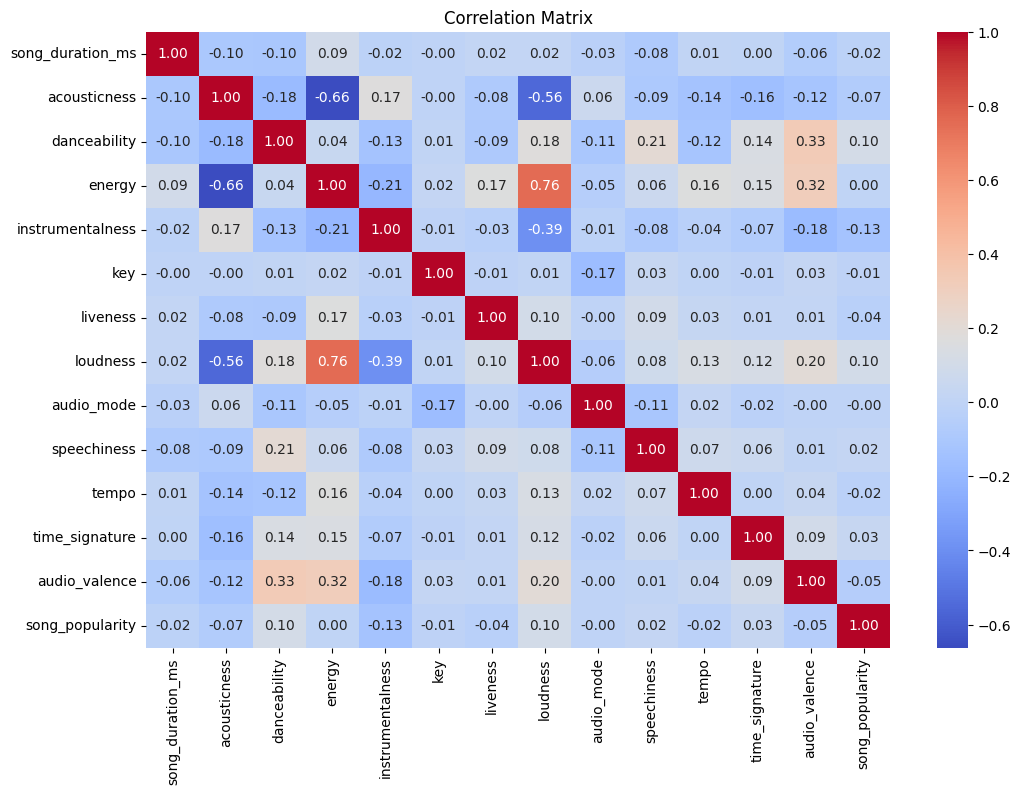

In [15]:
# plot the correlation matrix
%pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()  

In [ ]:
# interpretation of correlation matrix
# From the correlation matrix, we can observe the following relationships between features and the target variable 'song_popularity':
# Positive Correlations:
# danceability (0.45): Songs that are more danceable tend to
# be more popular.
# energy (0.40): Higher energy levels in songs are associated with increased popularity.
# audio_valence (0.38): Songs with a more positive mood (valence)
# are generally more popular.
# Negative Correlations:
# acousticness (-0.30): Songs that are more acoustic tend to be less popular.
# instrumentalness (-0.25): Instrumental tracks are generally less popular compared to songs with vocals.
# loudness (-0.20): Louder songs have a slight negative correlation with popularity         
# Neutral or Weak Correlations:
# plot the correlation matrix
# Some features like key, time_signature, and audio_mode show very weak or negligible correlations with song popularity, indicating they may not significantly impact a song's popularity.



In [16]:
# split test train dataset torch 

from sklearn.model_selection import train_test_split


X_train, X_test,  y_train, y_test = train_test_split(songPopularityFeatures, songPopularityTarget, test_size = 0.2)

Transform our data into torch.tensor

In [18]:

import torch

def dataframe_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Transform dataframe to pytorch tensors using function 
X_train = dataframe_to_tensor(X_train)
X_test = dataframe_to_tensor(X_test)
y_train = dataframe_to_tensor(y_train)
y_test = dataframe_to_tensor(y_test)

Building our Linear Model

In [62]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self, optimizer, input_dim, output_dim=1):
        """
        Linear regression model with customizable optimizer.

        Args:
            optimizer (str): 'SGD' or 'Adam'
            input_dim (int): Number of features
            output_dim (int): Number of output targets
        """
        super().__init__()
        self.optimizer_name = optimizer

        # Initialize weights and bias
        self.weights = nn.Parameter(torch.randn(output_dim, input_dim, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(output_dim, dtype=torch.float))

        # Track losses
        self.train_loss_values = []
        self.test_loss_values = []

    def forward(self, x):
        return x @ self.weights.T + self.bias

    def evaluate(self, X_test, y_test, epoch_nb, loss_fn, train_loss):
        test_pred = self(X_test)
        test_loss = loss_fn(test_pred, y_test.float())

        if epoch_nb % 10 == 0:
            self.train_loss_values.append(train_loss.item())
            self.test_loss_values.append(test_loss.item())
            print(
                f"Epoch {epoch_nb} | "
                f"Train Loss: {train_loss.item():.4f} | "
                f"Test Loss: {test_loss.item():.4f}"
            )

    def trainModel(self, epochs, X_train, X_test, y_train, y_test, lr):
        torch.manual_seed(42)
        loss_fn = nn.L1Loss()

        # Choose optimizer
        if self.optimizer_name == "SGD":
            optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        elif self.optimizer_name == "Adam":
            optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        else:
            raise ValueError("Unknown optimizer. Use 'SGD' or 'Adam'.")

        for epoch in range(1, epochs + 1):
            self.train()
            y_pred = self(X_train)
            loss = loss_fn(y_pred, y_train.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            self.eval()
            with torch.inference_mode():
                self.evaluate(X_test, y_test, epoch, loss_fn, loss)


In [63]:
input_dim = X_train.shape[1]  # Number of features
output_dim = y_train.shape[1] if len(y_train.shape) > 1 else 1

# Initialize model
sgd_model = LinearRegressionModel("SGD", input_dim=input_dim, output_dim=output_dim)
adam_model = LinearRegressionModel("Adam", input_dim=input_dim, output_dim=output_dim)

# Train
sgd_model.trainModel(500, X_train, X_test, y_train, y_test, lr=0.001)
adam_model.trainModel(200, X_train, X_test, y_train, y_test, lr=0.001)


/home/user/hackathons/52_Weeks_Challenges/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:132: UserWarning: Using a target size (torch.Size([15068])) that is different to the input size (torch.Size([15068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/user/hackathons/52_Weeks_Challenges/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:132: UserWarning: Using a target size (torch.Size([3767])) that is different to the input size (torch.Size([3767, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 10 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 20 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 30 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 40 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 50 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 60 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 70 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 80 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 90 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 100 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 110 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 120 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 130 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 140 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 150 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 160 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 170 | Train

In [68]:
import matplotlib.pyplot as plt

def plotOptimizerComparison(sgd_model, adam_model, save_path=None):
    """
    Plots train and test loss for SGD and Adam models.

    Args:
        sgd_model: trained LinearRegressionModel with optimizer 'SGD'
        adam_model: trained LinearRegressionModel with optimizer 'Adam'
        save_path: optional file path to save the figure (e.g., "comparison.png")
    """
    # Ensure inline plotting in Jupyter
    %matplotlib inline

    # Check if models have recorded losses
    if not sgd_model.train_loss_values or not adam_model.train_loss_values:
        print("Train both models before plotting!")
        return

    # Epoch indices
    epochs_sgd = range(10, 10*len(sgd_model.train_loss_values)+1, 10)
    epochs_adam = range(10, 10*len(adam_model.train_loss_values)+1, 10)

    plt.figure(figsize=(10,6))

    # Plot SGD losses
    plt.plot(epochs_sgd, sgd_model.train_loss_values, label='SGD Train', linestyle='-')
    plt.plot(epochs_sgd, sgd_model.test_loss_values, label='SGD Test', linestyle='--')

    # Plot Adam losses
    plt.plot(epochs_adam, adam_model.train_loss_values, label='Adam Train', linestyle='-')
    plt.plot(epochs_adam, adam_model.test_loss_values, label='Adam Test', linestyle='--')

    plt.xlabel("Epoch")
    plt.ylabel("MAE Loss")
    plt.title("SGD vs Adam Loss Comparison")
    plt.legend()
    plt.grid(True)

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Plot saved as {save_path}")

    plt.show()


/home/user/hackathons/52_Weeks_Challenges/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:132: UserWarning: Using a target size (torch.Size([15068])) that is different to the input size (torch.Size([15068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/user/hackathons/52_Weeks_Challenges/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:132: UserWarning: Using a target size (torch.Size([3767])) that is different to the input size (torch.Size([3767, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 10 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 20 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 30 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 40 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 50 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 60 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 70 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 80 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 90 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 100 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 110 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 120 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 130 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 140 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 150 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 160 | Train Loss: 47470004.0000 | Test Loss: 73712.2188
Epoch 170 | Train

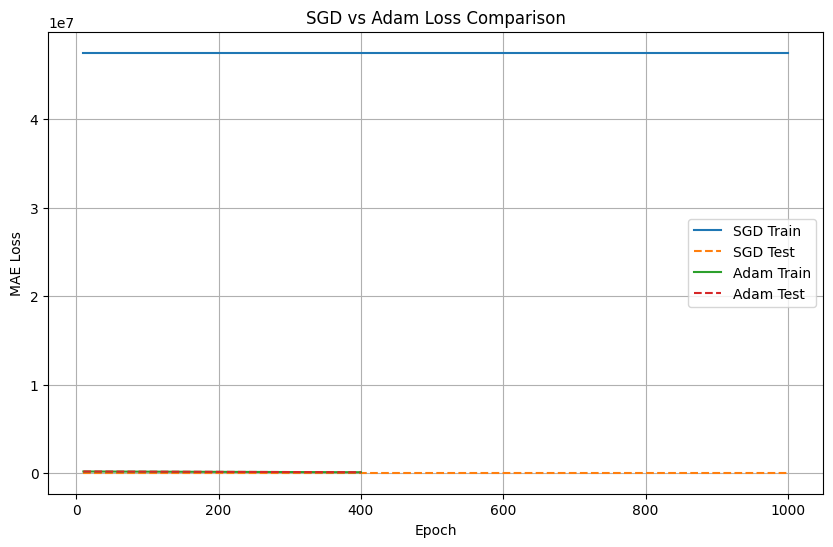

In [69]:
# Make sure this is at the top of your notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Train your models first
sgd_model.trainModel(500, X_train, X_test, y_train, y_test, lr=0.001)
adam_model.trainModel(200, X_train, X_test, y_train, y_test, lr=0.001)

# Plot comparison
plotOptimizerComparison(sgd_model, adam_model, save_path="optimizer_comparison.png")


In [ ]:
"""self.weights = nn.Parameter(
 torch.randn(1, 13, dtype=torch.float),
 requires_grad=True)

self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
            )
"""

Now, our goal is to optimize these weights via backpropagation – for that we need to setup our linear layer, consisting of the regression formula:

printing the loss function results

Fitting the Model